In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [9]:
donne = pd.read_csv('C:\\Users\\Francial\\Notebook\\Data\\DATALINEAIRE\\donne.csv')
donne.head()

,PRODUCTION,IRRADIATION,PRECIPITATION,TEMPERATURE,WINDSPEED,DATE_STR
0,0,0.0,0.00,1.61,8.99,2020-01-01
1,0,0.0,0.00,1.55,8.78,2020-01-01
2,0,0.0,0.00,1.53,8.99,2020-01-01
3,0,0.0,0.01,1.53,9.32,2020-01-01
4,0,0.0,0.02,1.30,9.37,2020-01-01


In [10]:
X = ["IRRADIATION", "PRECIPITATION", "TEMPERATURE", "WINDSPEED"]
Y = ["PRODUCTION"]
data_X = donne[X]
data_y = donne[Y]

In [11]:
data_X.head()

,IRRADIATION,PRECIPITATION,TEMPERATURE,WINDSPEED
0,0.0,0.00,1.61,8.99
1,0.0,0.00,1.55,8.78
2,0.0,0.00,1.53,8.99
3,0.0,0.01,1.53,9.32
4,0.0,0.02,1.30,9.37


In [12]:
data_y.head()

,PRODUCTION
0,0
1,0
2,0
3,0
4,0


# Régression lineaire multiple

RMSE = 78.98253882264626
MAE = 47.6877927517896
MSE = 6238.241438870825


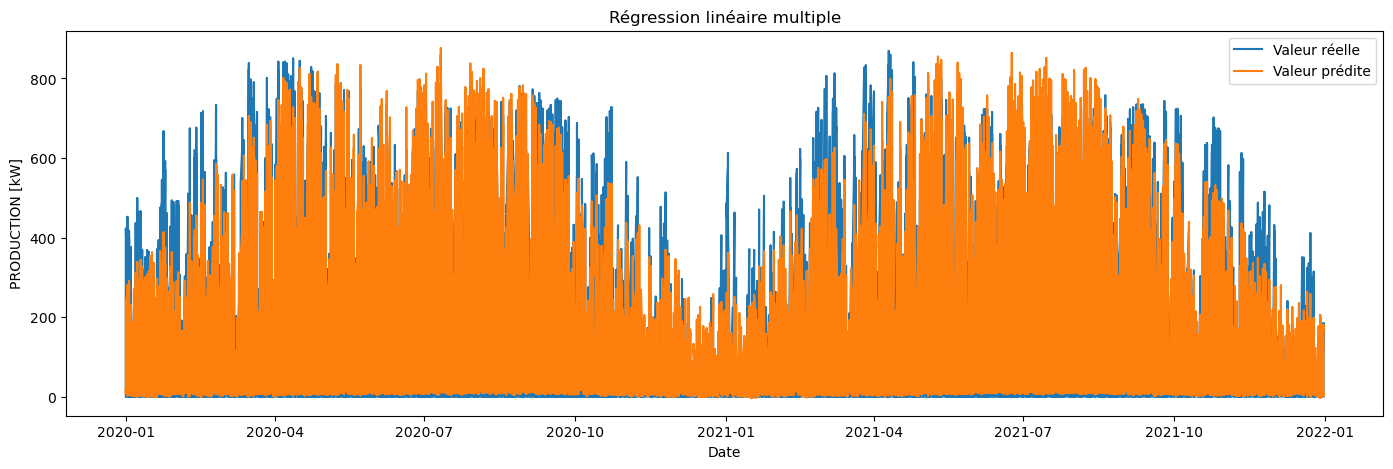

In [13]:
donne['DATE_STR'] = pd.to_datetime(donne['DATE_STR'])
donne['DATE_NUMERIC'] = donne['DATE_STR'].apply(lambda x: x.timestamp())
donne = donne.sort_values(by='DATE_NUMERIC')
data_X = donne.drop(['DATE_STR', 'DATE_NUMERIC', 'PRODUCTION'], axis=1)
data_y = donne['PRODUCTION']
model = LinearRegression()
model.fit(data_X, data_y)
y_pred = model.predict(data_X)
rmse = np.sqrt(metrics.mean_squared_error(data_y, y_pred))
print(f'RMSE = {rmse}')
mae = metrics.mean_absolute_error(data_y, y_pred)
mse = metrics.mean_squared_error(data_y, y_pred)
print(f'MAE = {mae}')
print(f'MSE = {mse}')
plt.figure(figsize=(17, 5))
plt.plot(donne['DATE_STR'], data_y, label='Valeur réelle')
plt.plot(donne['DATE_STR'], y_pred, label='Valeur prédite')
plt.title('Régression linéaire multiple')
plt.xlabel('Date')
plt.ylabel('PRODUCTION [kW]')
plt.legend()
plt.show()

# Régression Polynomiale

RMSE = 77.62134322774446
MAE = 45.87455471064085
MSE = 6025.07292447931


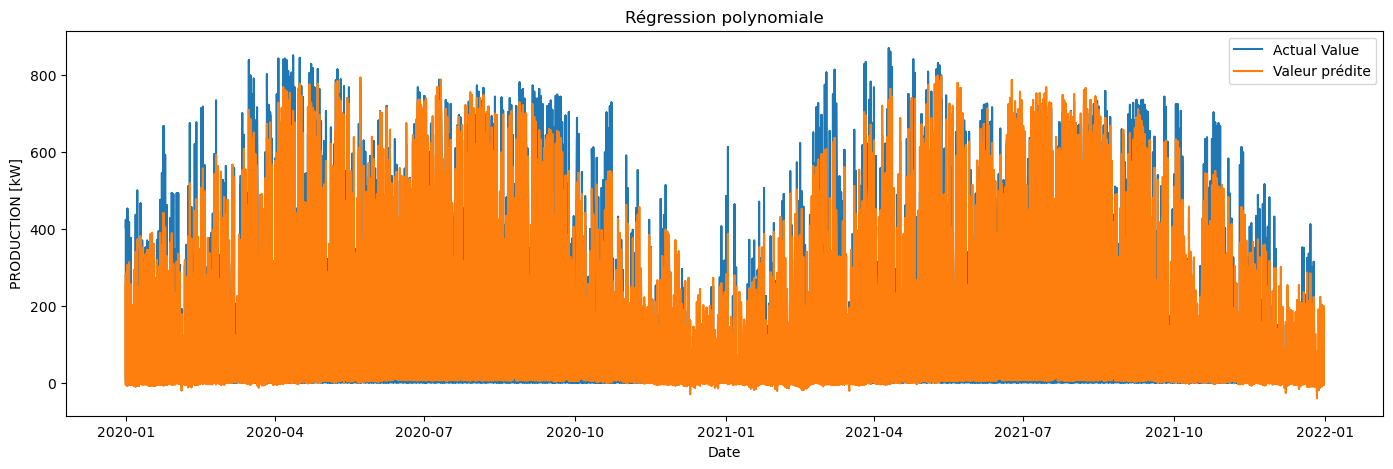

In [14]:
donne['DATE_STR'] = pd.to_datetime(donne['DATE_STR'])
donne['DATE_NUMERIC'] = donne['DATE_STR'].apply(lambda x: x.timestamp())
donne = donne.sort_values(by='DATE_NUMERIC')
data_X = donne.drop(['DATE_STR', 'DATE_NUMERIC', 'PRODUCTION'], axis=1) 
data_y = donne['PRODUCTION']
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(data_X, data_y)
y_pred = model.predict(data_X)
rmse = np.sqrt(metrics.mean_squared_error(data_y, y_pred))
print(f'RMSE = {rmse}')
mae = metrics.mean_absolute_error(data_y, y_pred)
mse = metrics.mean_squared_error(data_y, y_pred)
print(f'MAE = {mae}')
print(f'MSE = {mse}')
plt.figure(figsize=(17, 5))
plt.plot(donne['DATE_STR'], data_y, label='Actual Value')
plt.plot(donne['DATE_STR'], y_pred, label='Valeur prédite')
plt.title('Régression polynomiale')
plt.xlabel('Date')
plt.ylabel('PRODUCTION [kW]')
plt.legend()
plt.show()

# RandomForestRegressor

RMSE = 29.298809105318018
MAE = 16.38279138095781
MSE = 858.4202149898659


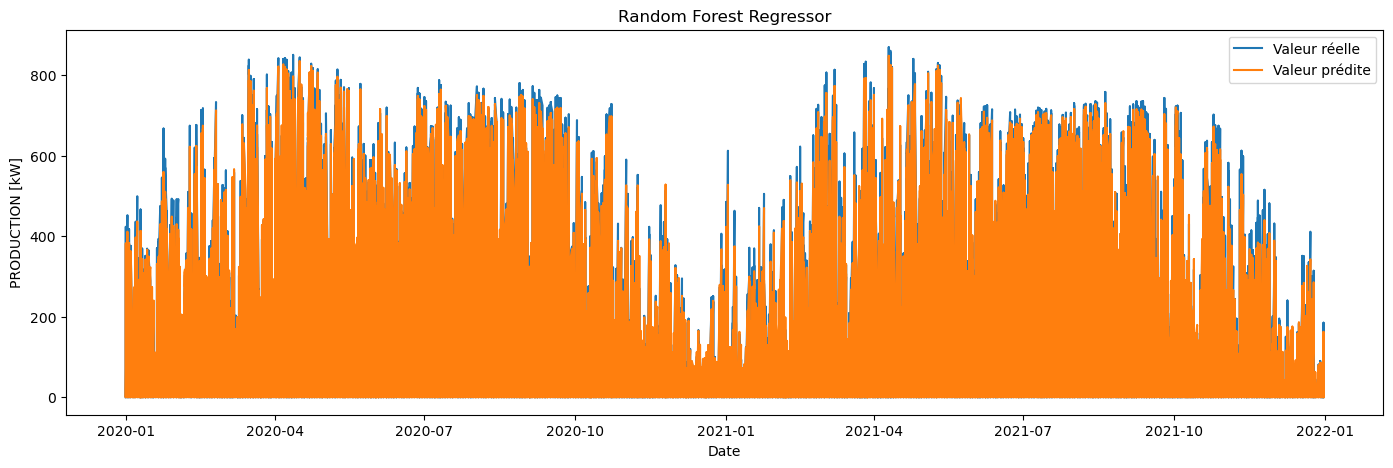

In [15]:
donne['DATE_STR'] = pd.to_datetime(donne['DATE_STR'])
donne['DATE_NUMERIC'] = donne['DATE_STR'].apply(lambda x: x.timestamp())
donne = donne.sort_values(by='DATE_NUMERIC')
data_X = donne.drop(['DATE_STR', 'DATE_NUMERIC', 'PRODUCTION'], axis=1)  # Assurez-vous d'ajuster cela en fonction de votre structure de données
data_y = donne['PRODUCTION']
model = RandomForestRegressor()
model.fit(data_X, data_y)
y_pred = model.predict(data_X)
rmse = np.sqrt(metrics.mean_squared_error(data_y, y_pred))
print(f'RMSE = {rmse}')
mae = metrics.mean_absolute_error(data_y, y_pred)
mse = metrics.mean_squared_error(data_y, y_pred)
print(f'MAE = {mae}')
print(f'MSE = {mse}')
plt.figure(figsize=(17, 5))
plt.plot(donne['DATE_STR'], data_y, label='Valeur réelle')
plt.plot(donne['DATE_STR'], y_pred, label='Valeur prédite')
plt.title('Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('PRODUCTION [kW]')
plt.legend()
plt.show()